# EDA for FiveThirtyEight College Majors Dataset

https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/recent-grads.csv')

Part 0: Understand the Data Structure

In [ ]:
print(data.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [ ]:
print(data.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
# This dataset is composed mostly of numerical data

Part 1: Data Cleaning

In [ ]:
# Look at how many missing values are in this dataset:
print("Missing Values:")
print(data.isnull().sum())

# The number of missing values is very small in each feature, so we do not need
# to worrying about removing features containing to many NAs. Instead, we directly
# dropped those few NA values which won't affect the general result
data_cleaned = data.dropna()

print("Cleaned Dataset:")
print(data_cleaned.head())

print("Summary Statistics of Cleaned Data:")
print(data_cleaned.describe())

Missing Values:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
Cleaned Dataset:
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405              

Part 2: Distribution Analysis

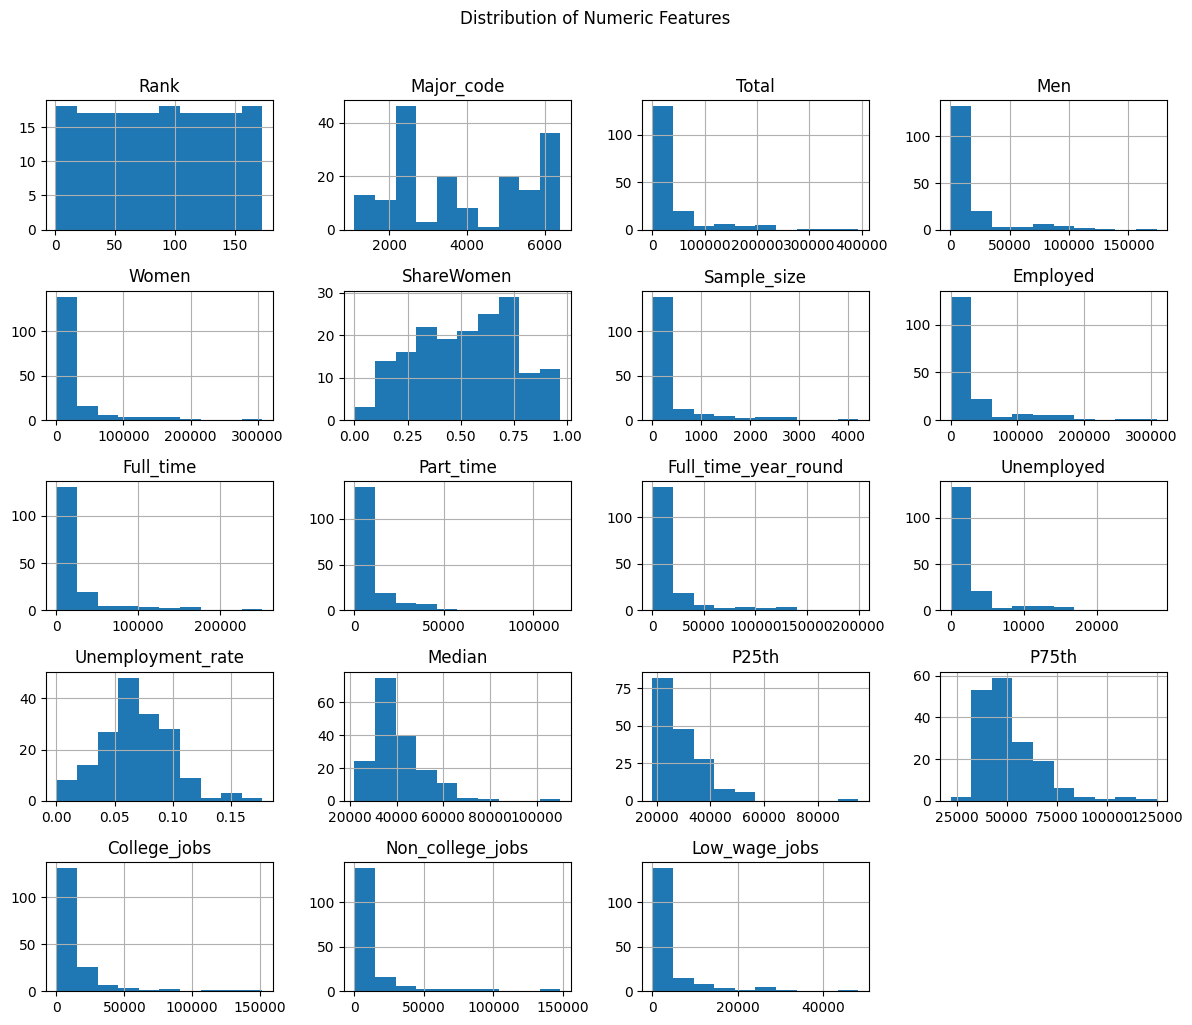

In [ ]:
# Plot the distribution of each numeric features
df_num = data.select_dtypes(include = 'number')

df_num.hist(figsize=(12, 10))
plt.suptitle('Distribution of Numeric Features', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Find categorical variables
df_cate = data.select_dtypes(include = ['O'])
print('There are {} non numerical features including:\n{}'.format(len(df_cate.columns), df_cate.columns.tolist()))

There are 2 non numerical features including:
['Major', 'Major_category']


<Axes: xlabel='Major_category', ylabel='count'>

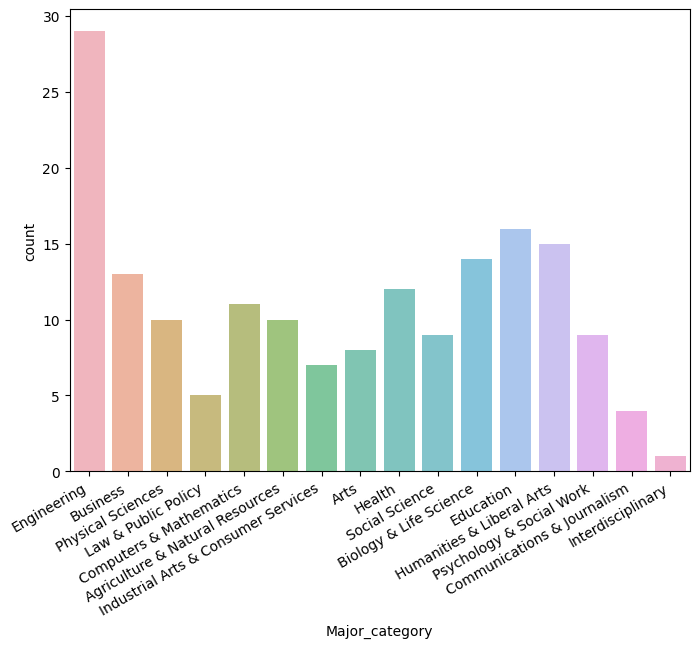

In [ ]:
# Plot distribution of major categories
fig, ax = plt.subplots(figsize=(8, 6))
plt.setp(ax.get_xticklabels(), rotation=30, ha = "right")
sns.countplot(x = df_cate.columns[1], alpha = 0.7, data = df_cate, ax = ax)

Part 3: Feature Selection

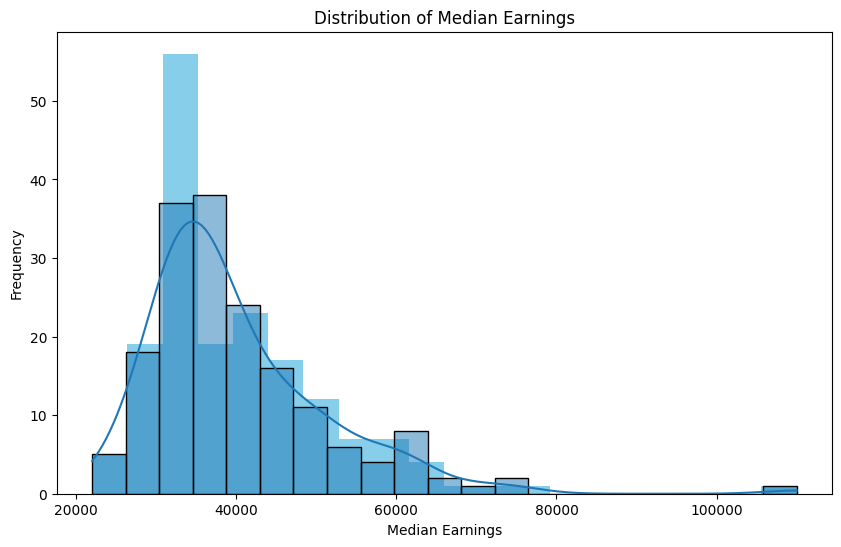

In [ ]:
# Histogram of Median Earnings
plt.figure(figsize=(10, 6))
plt.hist(data['Median'], bins=20, color='skyblue')
sns.histplot(data['Median'], kde = True)
plt.title('Distribution of Median Earnings')
plt.xlabel('Median Earnings')
plt.ylabel('Frequency')
plt.show()


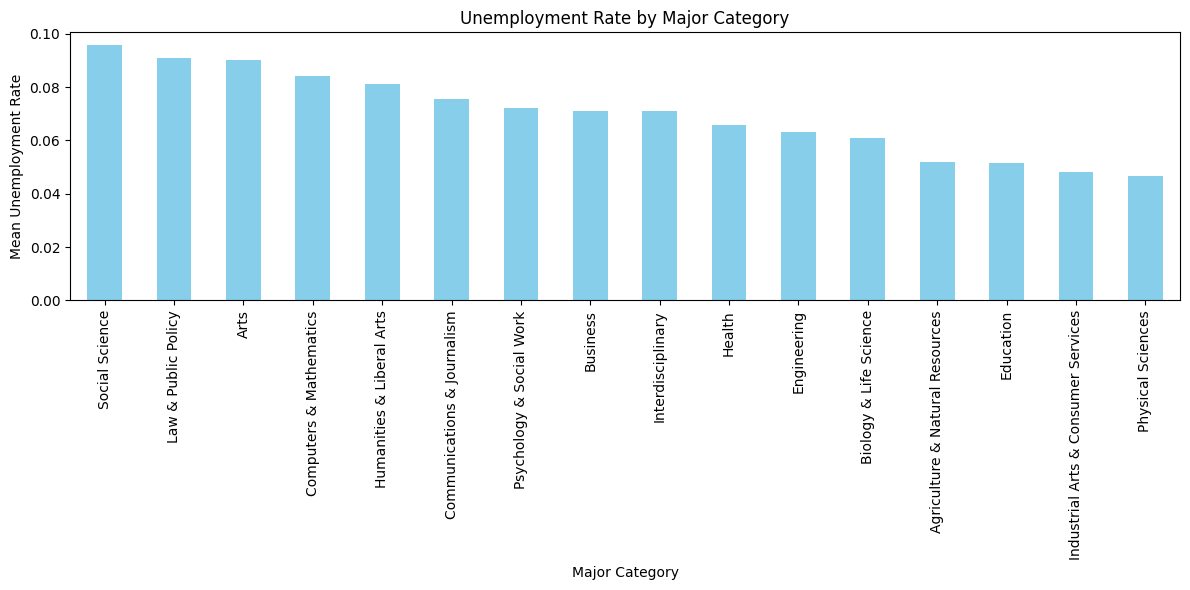

In [ ]:
unemployment_by_category = data_cleaned.groupby('Major_category')['Unemployment_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
unemployment_by_category.plot(kind='bar', color='skyblue')
plt.title('Unemployment Rate by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Mean Unemployment Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

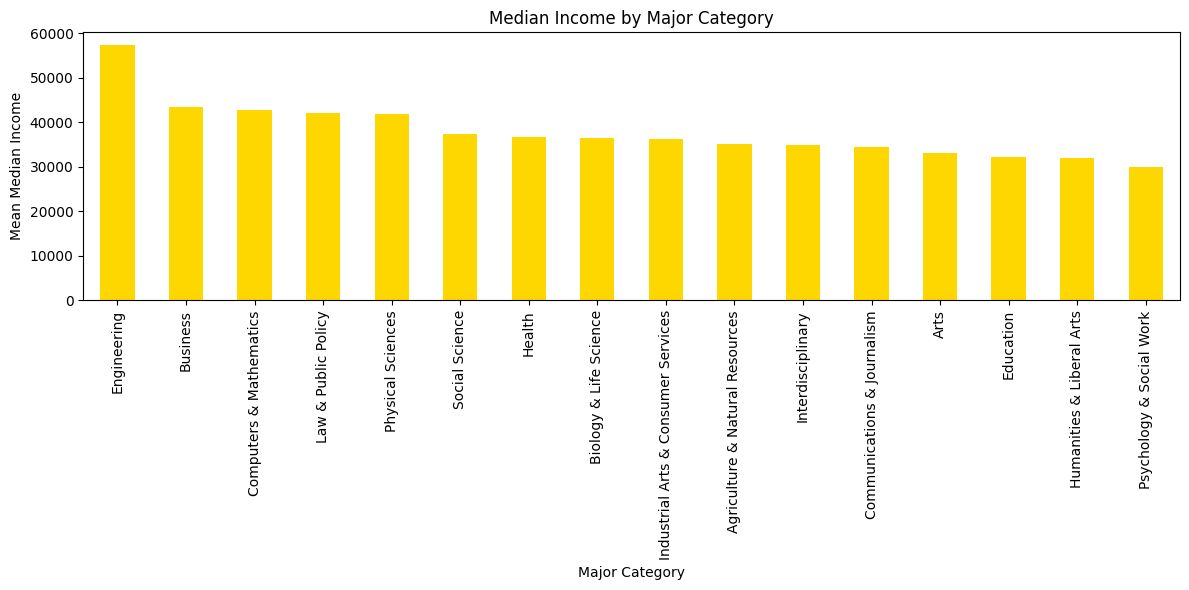

In [ ]:
median_income_by_category = data_cleaned.groupby('Major_category')['Median'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
median_income_by_category.plot(kind='bar', color='gold')
plt.title('Median Income by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Mean Median Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

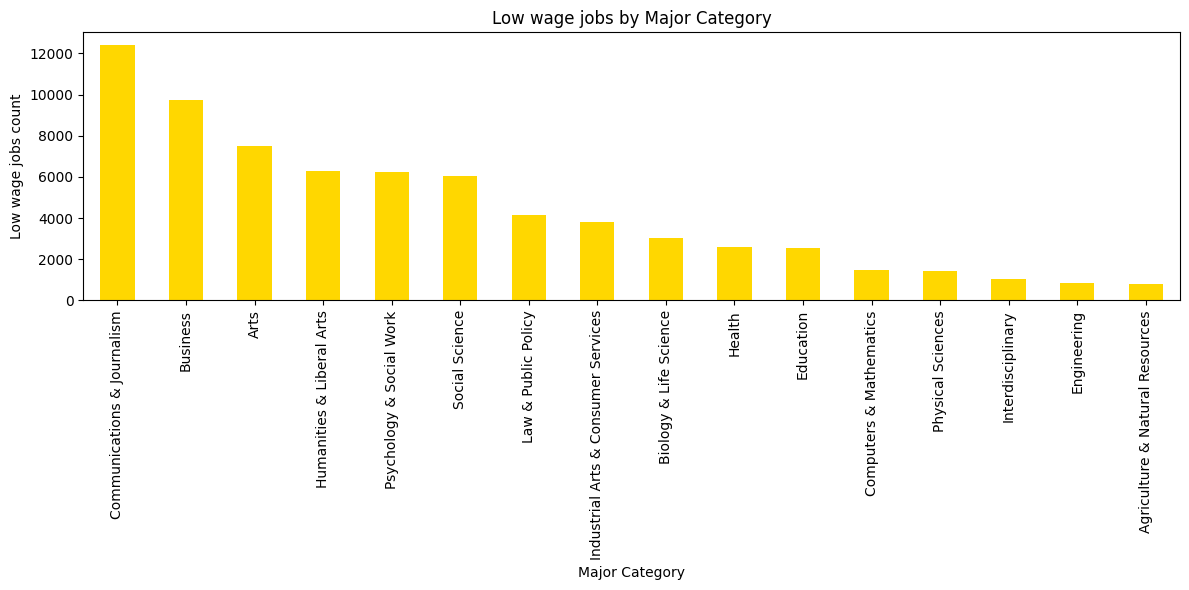

In [ ]:
Low_wage_by_category = data_cleaned.groupby('Major_category')['Low_wage_jobs'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
Low_wage_by_category.plot(kind='bar', color='gold')
plt.title('Low wage jobs by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Low wage jobs count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

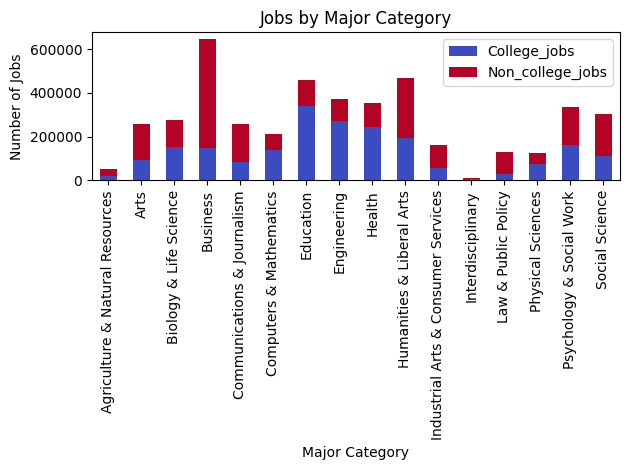

In [ ]:
job_categories = ['College_jobs', 'Non_college_jobs']
job_data = data_cleaned.groupby('Major_category')[job_categories].sum()

plt.figure(figsize=(12, 6))
job_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Jobs by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

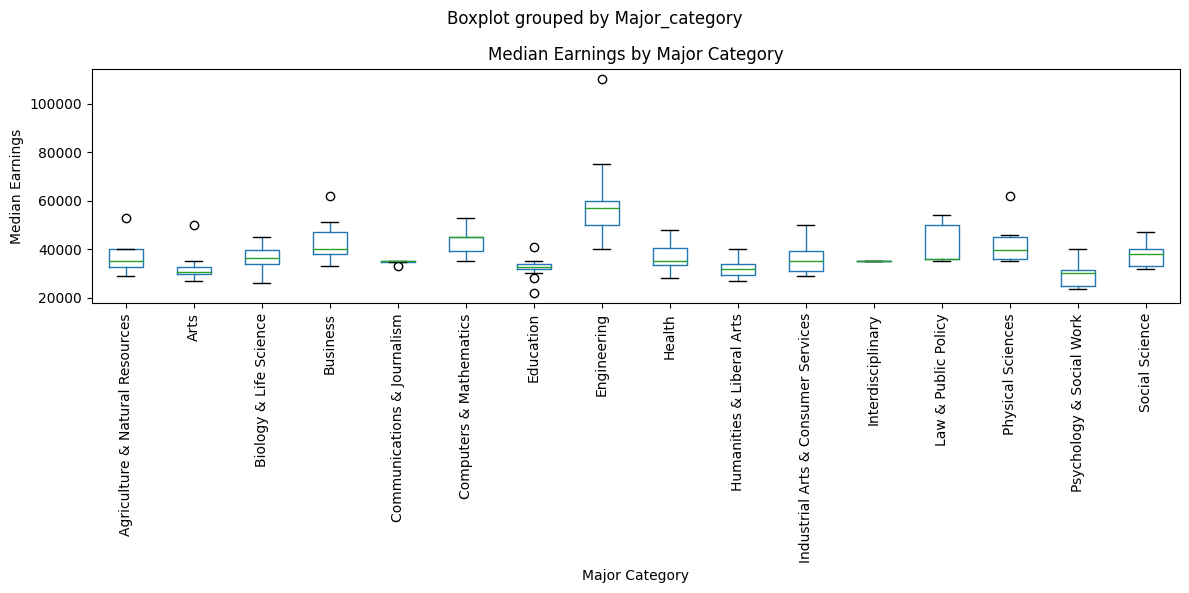

In [ ]:
# Box plot of Median Earnings by Major Category
plt.figure(figsize=(12, 6))
data.boxplot(column='Median', by='Major_category', rot=90, grid=False, figsize=(12, 6))
plt.title('Median Earnings by Major Category')
plt.ylabel('Median Earnings')
plt.xlabel('Major Category')
plt.tight_layout()
plt.show()



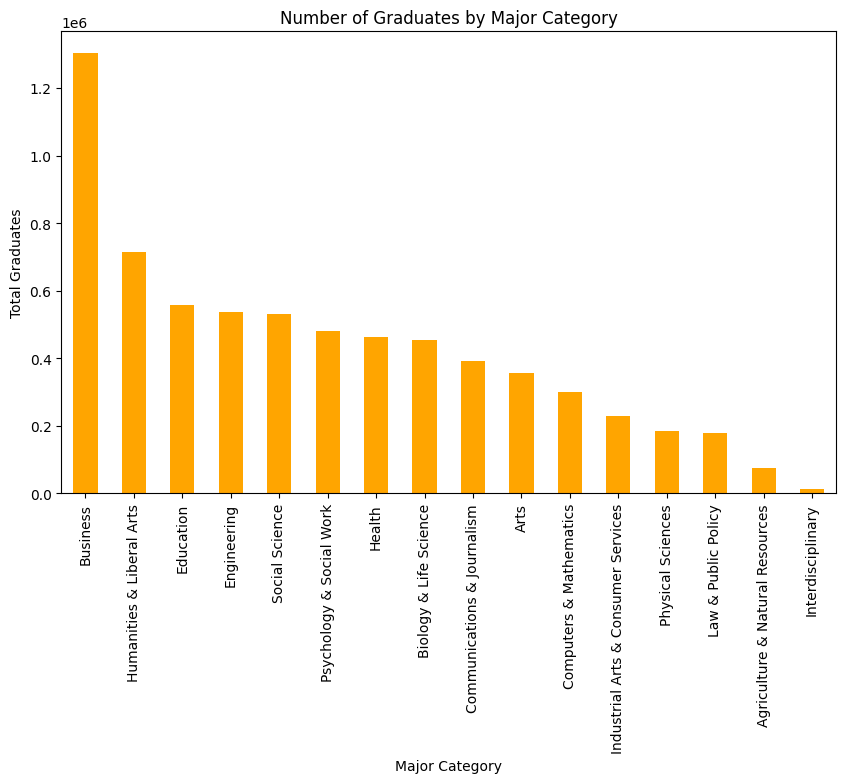

In [ ]:
# Bar plot of the Number of Graduates by Major Category
graduates_by_category = data.groupby('Major_category')['Total'].sum().sort_values(ascending=False)
graduates_by_category.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Graduates by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Total Graduates')
plt.xticks(rotation=90)
plt.show()

Part 4: Correlation Analysis

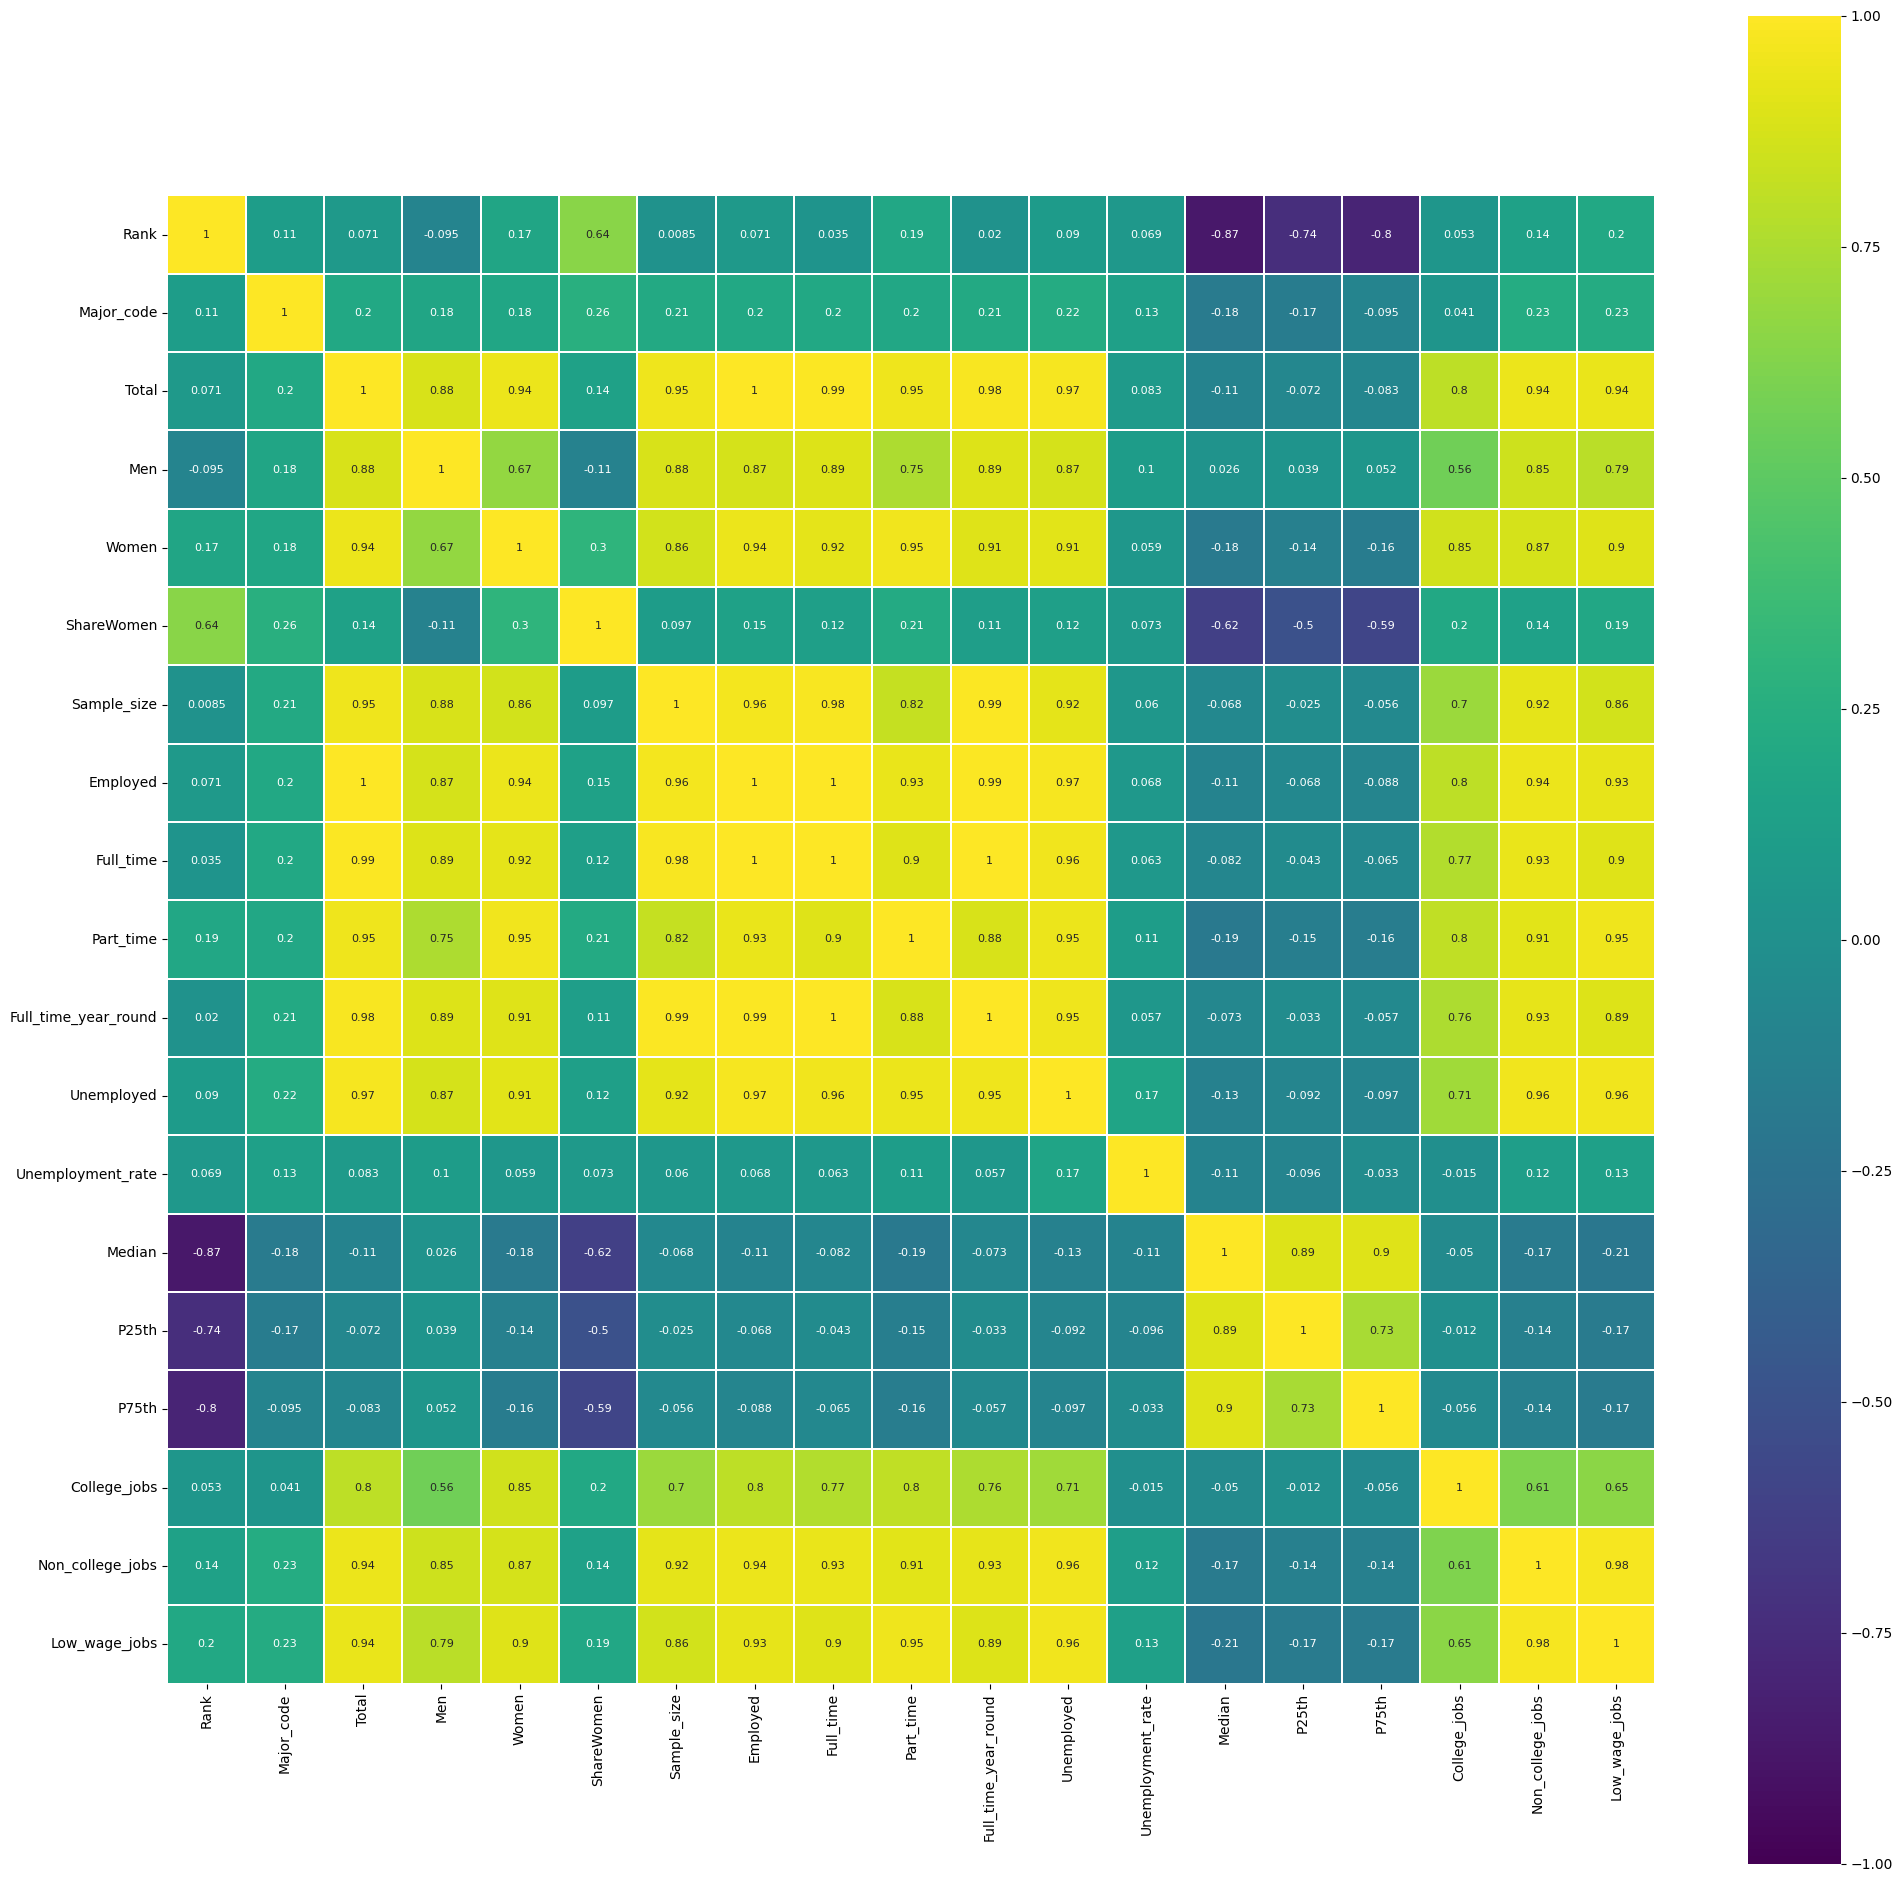

In [ ]:
df_corr = data.corr(numeric_only = True)
plt.figure(figsize=(24, 24))

sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df_corr_median = df_corr.iloc[:, 13:14]
df_corr_median
median_golden_features_list = df_corr_median[abs(df_corr_median) > 0.5].sort_values(by = "Median", ascending=False)
median_golden_features_list = median_golden_features_list.dropna()
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(median_golden_features_list), median_golden_features_list))

There is 5 strongly correlated values with SalePrice:
              Median
Median      1.000000
P75th       0.901923
P25th       0.891683
ShareWomen -0.618690
Rank       -0.873308


In [ ]:
# Subset out the meaningless features

# The top correlated features P75th and P25th, representing the 25th and 75th
# percentiles, are meaningless because they are only statistical numbers similar
# to the median and mean to be strongly correlated with the median (50th percentile)
median_golden_features_list = median_golden_features_list[2:5]

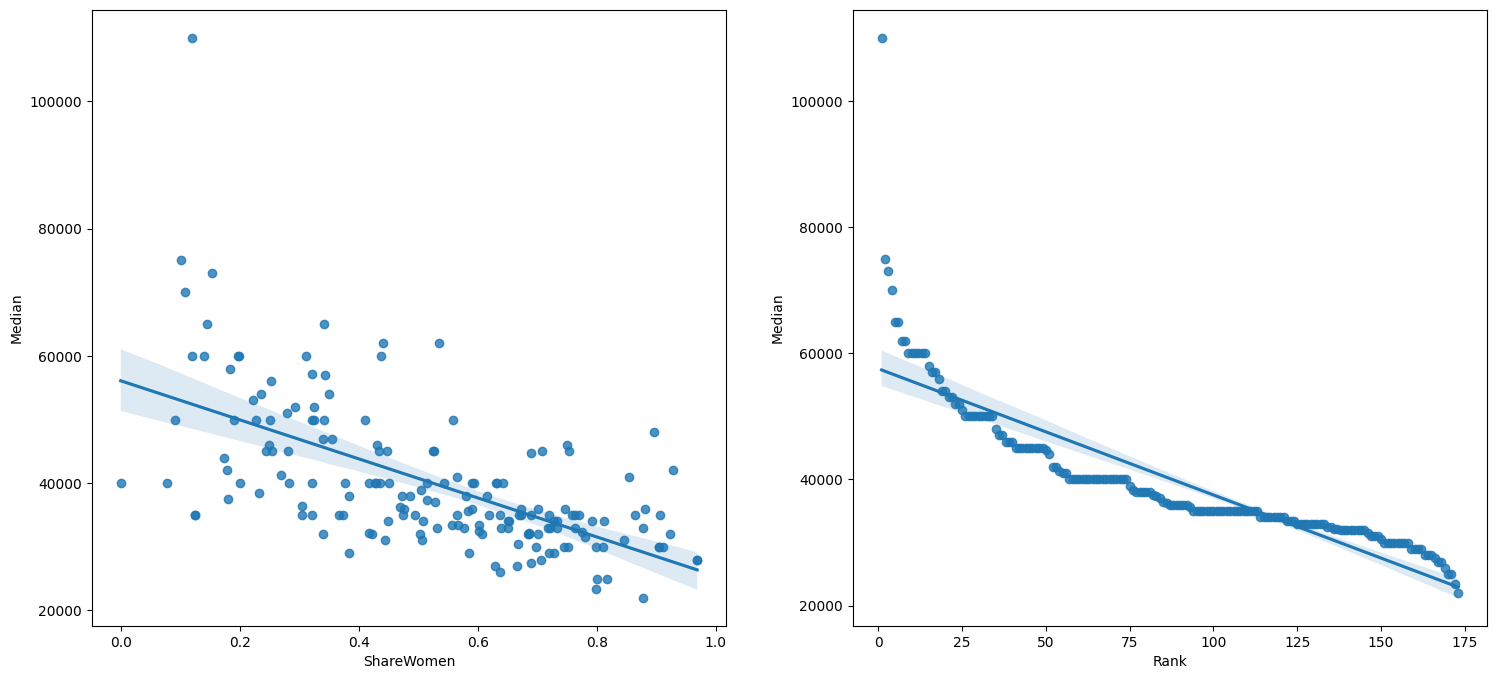

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))

for i, ax in enumerate(fig.axes):
    if i < len(median_golden_features_list) - 1:
        sns.regplot(data, x = median_golden_features_list.index[i+1], y = "Median", ax = ax)